# Extensive apriltag detection
In this code, we perform apriltag detection and trajectory estimation for a larger set of tags. Firstly, we define a dataframe which not only holds the coordinates of the tags, but also normal vectors indicating their orientation. This serves as a more general framework for arbitrary mapped geometries.

In [1]:
from pyneon import Recording

# Download sample data (if not existing) and return the path
sample_dir = "C:/Users/jan-gabriel.hartel/Documents/GitHub/PyNeon/data/April"
print(sample_dir)

recording = Recording(sample_dir)

print(recording)

C:/Users/jan-gabriel.hartel/Documents/GitHub/PyNeon/data/April

Recording ID: e29990bc-354d-4fb9-9725-91fc72ce3f92
Wearer ID: eb40d09b-9f09-4ccf-b56b-c1ff8ffd9f4e
Wearer name: Jan
Recording start time: 2024-12-11 15:55:30.974000
Recording duration: 73.91s
                 exist                filename                                                                                   path
3d_eye_states     True       3d_eye_states.csv       C:\Users\jan-gabriel.hartel\Documents\GitHub\PyNeon\data\April\3d_eye_states.csv
blinks            True              blinks.csv              C:\Users\jan-gabriel.hartel\Documents\GitHub\PyNeon\data\April\blinks.csv
events            True              events.csv              C:\Users\jan-gabriel.hartel\Documents\GitHub\PyNeon\data\April\events.csv
fixations         True           fixations.csv           C:\Users\jan-gabriel.hartel\Documents\GitHub\PyNeon\data\April\fixations.csv
gaze              True                gaze.csv                C:\Users\jan

Next, we provide the tag positions. In our case, tags were placed around the perimeter wall of a large room. 
In definining the tags_df, we need to provide the tag_ids with their corresponding center position (x, y, z), orientation (normal_x, normal_y, normal_z) and size. This uni

In [2]:
import pandas as pd

tags = {
    "tag_id": list(range(20)),
    "x": [
        11.1860,
        11.1860,
        11.1860,
        11.1860,
        10.0085,
        8.7485,
        7.1495,
        4.6965,
        2.5255,
        0.7675,
        0.0000,
        0.0000,
        0.0000,
        0.0000,
        0.7345,
        2.7695,
        4.9775,
        6.3755,
        7.6245,
        10.2175,
    ],
    "y": [
        0.9975,
        2.6235,
        4.3965,
        6.1965,
        7.4000,
        7.4000,
        7.4000,
        7.4000,
        7.4000,
        7.4000,
        6.4775,
        4.6765,
        2.8885,
        1.1295,
        0.0000,
        0.0000,
        0.0000,
        0.0000,
        0.0000,
        0.0000,
    ],
    "z": [1.5755] * 20,
    "normal_x": [-1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    "normal_y": [0, 0, 0, 0, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
    "normal_z": [0] * 20,
    "size": [0.089] * 20,
}

# Create the DataFrame
tags_df = pd.DataFrame(tags)

print(tags_df)

    tag_id        x       y       z  normal_x  normal_y  normal_z   size
0        0  11.1860  0.9975  1.5755        -1         0         0  0.089
1        1  11.1860  2.6235  1.5755        -1         0         0  0.089
2        2  11.1860  4.3965  1.5755        -1         0         0  0.089
3        3  11.1860  6.1965  1.5755        -1         0         0  0.089
4        4  10.0085  7.4000  1.5755         0        -1         0  0.089
5        5   8.7485  7.4000  1.5755         0        -1         0  0.089
6        6   7.1495  7.4000  1.5755         0        -1         0  0.089
7        7   4.6965  7.4000  1.5755         0        -1         0  0.089
8        8   2.5255  7.4000  1.5755         0        -1         0  0.089
9        9   0.7675  7.4000  1.5755         0        -1         0  0.089
10      10   0.0000  6.4775  1.5755         1         0         0  0.089
11      11   0.0000  4.6765  1.5755         1         0         0  0.089
12      12   0.0000  2.8885  1.5755         1      

In [3]:
recording.detect_apriltags()
print("Apriltags detected")

Apriltags detected


In [4]:
recording.estimate_camera_pose(tags_df, overwrite=True)

,frame_idx,translation_vector,rotation_vector,camera_pos
0,26,"[-0.7054936994963087, 1.1373888508889398, -9.9...","[-1.013938143272837, -1.0123505141690003, -1.3...","[9.846715056317448, 0.8744587500901897, 1.5437..."
1,27,"[-0.8127574218635124, 2.269101016097196, -9.70...","[-0.9523859402888819, -0.9214918295939349, -1....","[9.857410891045163, 0.888267570974225, 1.40867..."
2,28,"[-0.031847983359460735, 2.1470136680657173, -9...","[-0.9314466247698661, -0.9731616321017268, -1....","[9.874896663252716, 0.7958499607517517, 1.4250..."
3,29,"[-0.12513787273659757, 1.2232121718964672, -9....","[-0.9882763584587849, -1.0381472283786868, -1....","[9.858554662374855, 0.8034826729163633, 1.5360..."
4,30,"[-0.1379454787017015, 1.671028481815101, -9.86...","[-0.958866490212472, -1.0062663351281351, -1.4...","[9.862039749617663, 0.8060111328333633, 1.4827..."
...,...,...,...,...
914,2182,"[-0.7170235983540649, 5.392694334159629, -8.37...","[-0.6241544523181941, -0.6938801372198384, -1....","[9.838308032582145, 0.825271067964334, 1.48036..."
915,2183,"[-0.48262572045457947, 5.592777705500462, -8.2...","[-0.6036450844619322, -0.6875836141050473, -1....","[9.847205446842851, 0.7967328718449231, 1.4564..."
916,2184,"[-0.7178378872687049, 5.29518946931396, -8.431...","[-0.6316088482172197, -0.7015613539898371, -1....","[9.834874583286002, 0.8272019770111956, 1.4966..."
917,2185,"[-3.1740108681779815, 4.743331962506281, -8.21...","[-0.7034889357025905, -0.618731969577687, -1.2...","[9.823962076225591, 1.1347534291667256, 1.5195..."


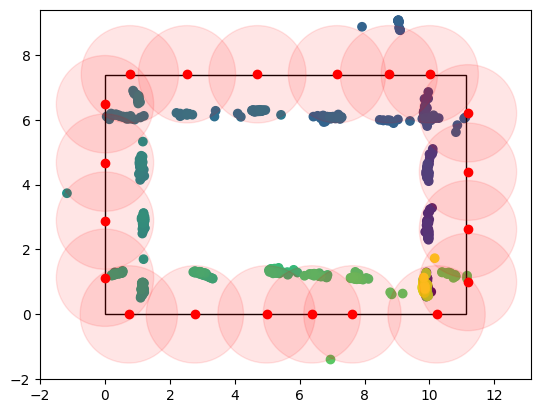

In [5]:
# plot the trajectory in xy for each recording

import matplotlib.pyplot as plt
import numpy as np


file = recording.der_dir / "camera_pose.json"
camera_position = pd.read_json(file, orient="records")

x = camera_position["camera_pos"].apply(lambda x: x[0]).values  # Extract x values
y = camera_position["camera_pos"].apply(lambda x: x[1]).values  # Extract y values
colors = np.arange(len(x))  # Create a color array based on the index

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x, y, c=colors, cmap="viridis")

room = plt.Rectangle((0, 0), 11.13, 7.39, fill=None, edgecolor="black", linewidth=1)
ax.add_patch(room)

ax.set_xlim([0 - 2, 11.13 + 2])
ax.set_ylim([0 - 2, 7.39 + 2])

for i in range(len(tags_df)):
    # draw tag positions as red dots
    ax.plot(tags_df["x"][i], tags_df["y"][i], "ro")
    circle = plt.Circle((tags_df["x"][i], tags_df["y"][i]), 1.5, color="red", alpha=0.1)
    ax.add_patch(circle)

ax.set_aspect("equal", "box")
plt.show()

We can well see that we obtain pose estimates only within a certain distance of a tag. Further, we cab see that we only obtain estimates when the tag is viewed statically, but not dynamically. Lastly, we can see that estimates are occasionally to the wrong side of the tags. 

In order to address these issues, we can borrow from the extensive robototics literature. Indeed, the problem we have here is one where we have both process noises (movement) and measurement noises (estimation of location from apriltag detection). as such, we can use Kalman filtering to obtain a trajectory which accounts for (some of) the errors seen above.

Explicitly, we can play around with initial state noise, process noise, measurement noise and, importantly, the gating threshold. Doing so, we can modify our data to be more or less accomodating to unexpected measurements.

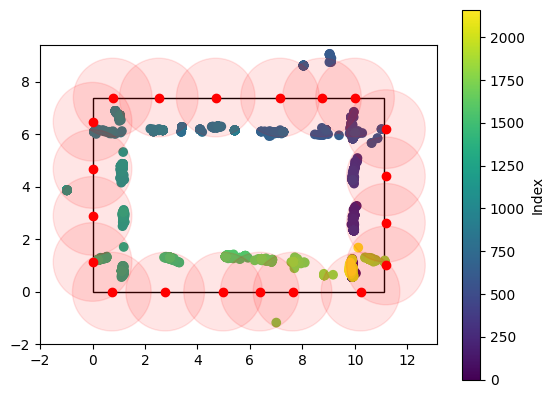

In [6]:
camera_position = recording.smooth_camera_pose(
    initial_state_noise=1,
    process_noise=1,
    measurement_noise=0.1,
    gating_threshold=3,
    bidirectional=False,
)

x = camera_position["camera_pos"].apply(lambda x: x[0]).values  # Extract x values
y = camera_position["camera_pos"].apply(lambda x: x[1]).values  # Extract y values
colors = np.arange(len(x))  # Create a color array based on the index

fig = plt.figure()
ax = fig.add_subplot(111)

room = plt.Rectangle((0, 0), 11.13, 7.39, fill=None, edgecolor="black", linewidth=1)
ax.add_patch(room)

ax.set_xlim([0 - 2, 11.13 + 2])
ax.set_ylim([0 - 2, 7.39 + 2])

scatter = ax.scatter(x, y, c=colors, cmap="viridis")

# Draw tag positions with semi-transparent red circles
for i in range(len(tags_df)):
    # draw tag positions as red dots
    ax.plot(tags_df["x"][i], tags_df["y"][i], "ro")
    circle = plt.Circle((tags_df["x"][i], tags_df["y"][i]), 1.5, color="red", alpha=0.1)
    ax.add_patch(circle)
plt.colorbar(scatter, label="Index")
ax.set_aspect("equal", "box")
plt.show()

We should be careful about this estimation. While it helps to create more continuous trajectories, it deviates from ground truth. Depending on how correctly the noise contributions are estimated, the obtained result can vary greatly from the actual trajectory. Thus, use caution in Kalman filtering

In [7]:
target_file = recording.der_dir / "undistort_video.mp4"

recording.video.undistort(output_video_path=target_file)

Resetting video...


Undistorting video: 100%|██████████| 2206/2206 [00:53<00:00, 40.91it/s]

Undistorted video saved to C:\Users\jan-gabriel.hartel\Documents\GitHub\PyNeon\data\April\derivatives\undistort_video.mp4


In [8]:
from pyneon import Dataset

file = recording.der_dir / "smoothed_camera_pose.json"
camera_position = pd.read_json(file, orient="records")

file = recording.der_dir / "apriltags.json"
april_detections = pd.read_json(file, orient="records", lines=True)

room_corners = np.array([[0, 0], [11.189, 0], [11.189, 7.39], [0, 7.39]])
recording.overlay_detections_and_pose(april_detections, camera_position, room_corners)

Resetting video...


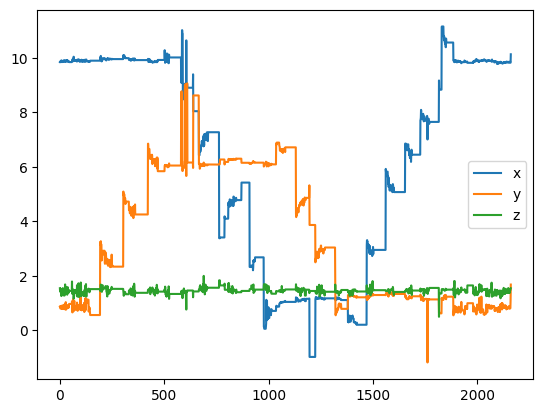

In [9]:
# show the trajectories of the camera position in x, y and z

x = camera_position["camera_pos"].apply(lambda x: x[0]).values  # Extract x values
y = camera_position["camera_pos"].apply(lambda x: x[1]).values  # Extract y values
z = camera_position["camera_pos"].apply(lambda x: x[2]).values  # Extract z values

fig = plt.figure()
plt.plot(x, label="x")
plt.plot(y, label="y")
plt.plot(z, label="z")

plt.legend()
plt.show()